___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df2 = df.copy()

#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
df.rename(columns={"Annual Income (k$)" : "Income", "Spending Score (1-100)" : "Spending_Score"}, inplace=True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





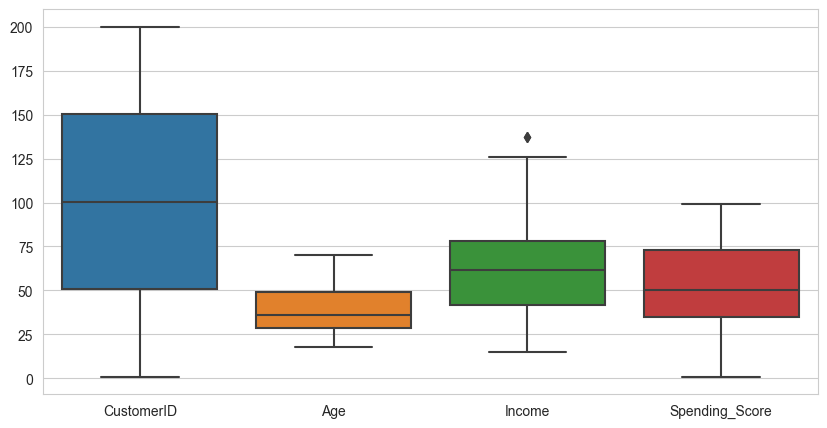

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df);

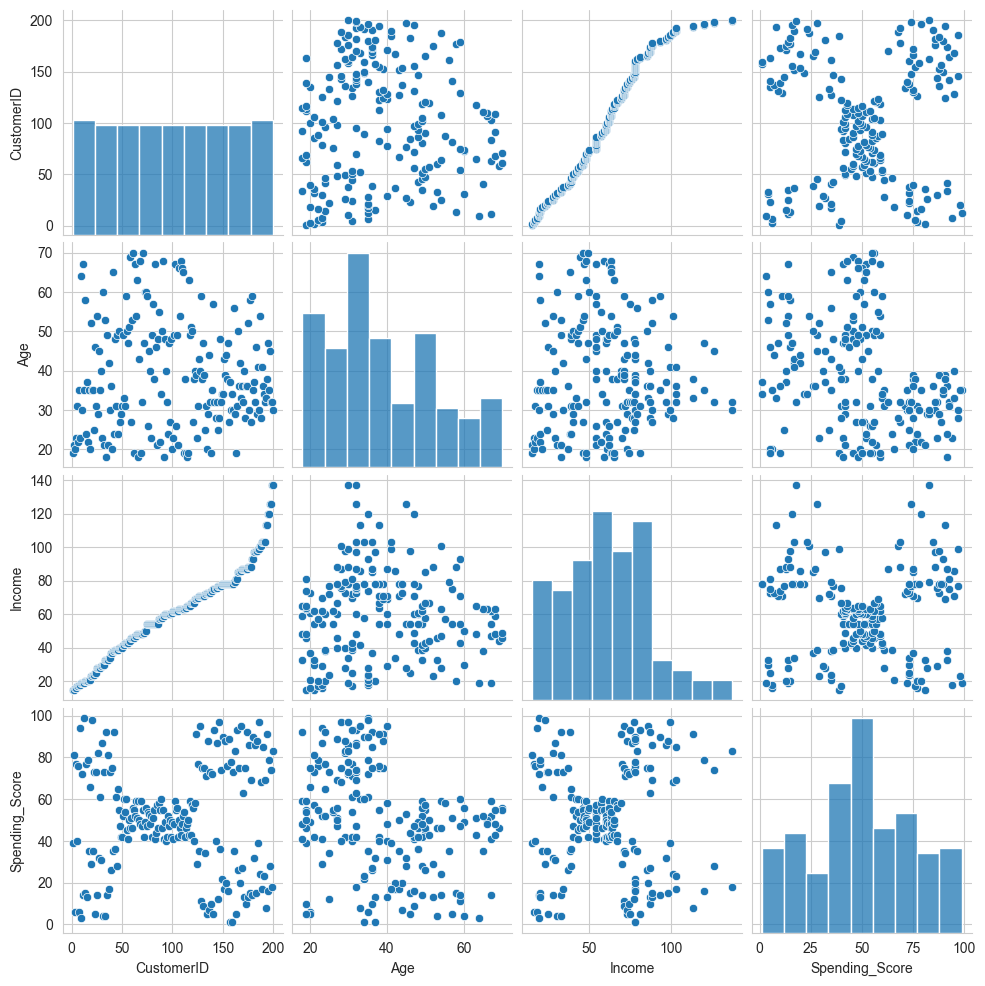

In [9]:
sns.pairplot(df)
plt.show();

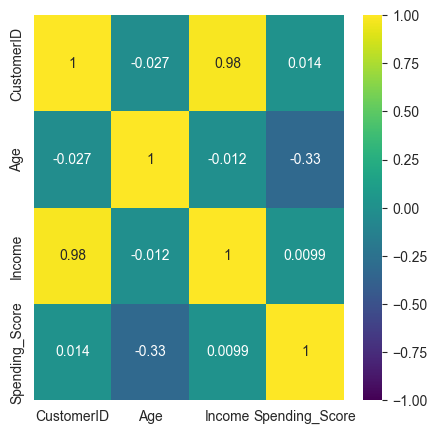

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='viridis');

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [11]:
X = df.iloc[:, [2, 4]]
X

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### *ii. Determine optimal number of clusters*

In [12]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# Normally, this function was implemented in the pyclustertend library but since the library was consistently
# causing incompatibility issues recently, we decided to explicitly define the function in our notebooks
# instead of installing the pyclustertend library and import it from there. So you don't need to install
# the pyclustertend library.

In [13]:
hopkins(X, X.shape[0])

0.2984967773474579

In [14]:
from sklearn.cluster import KMeans

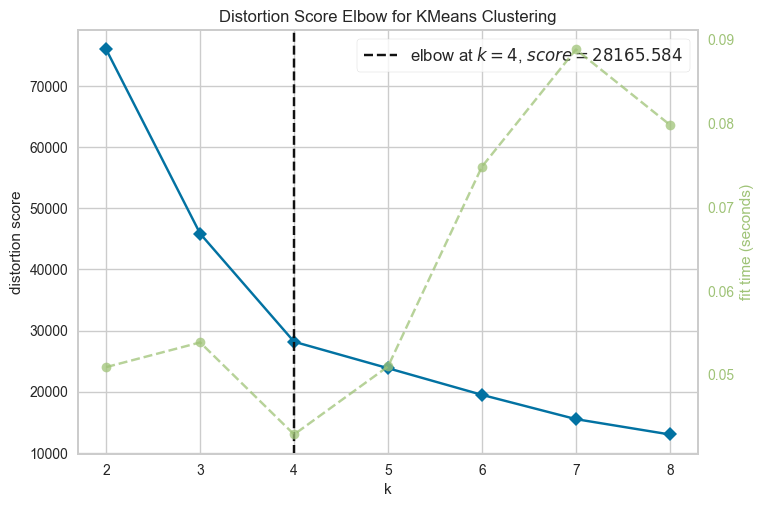

In [15]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

### Why silhouette_score is negative?

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


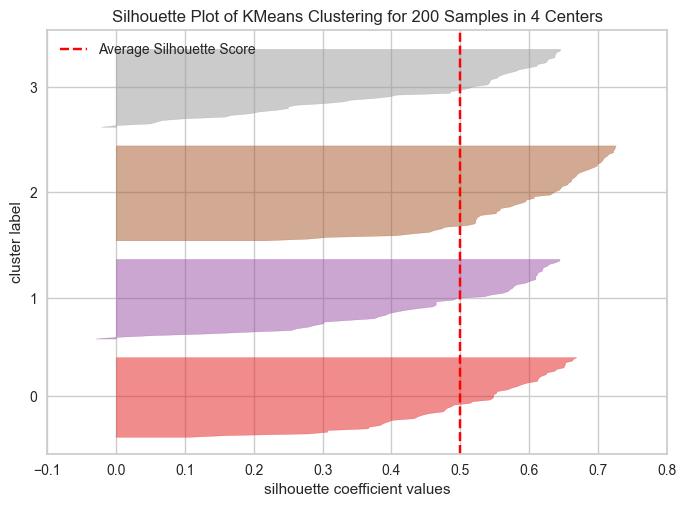

In [18]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model4 = KMeans(n_clusters=4, random_state=42)          # Check n_cluster=3
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

![image.png](attachment:image.png)

In [19]:
#model3.n_clusters
for i in range(4):
    label = (model4.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.45429047261675404
mean silhouette score for label 2    : 0.5960779476836082
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


#### *iii. Apply K Means*

In [20]:
model = KMeans(n_clusters = 4, random_state=42)
model.fit_predict(X)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [21]:
model.labels_

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [22]:
clusters = model.labels_

X["predicted_clusters"] = clusters

In [23]:
X

,Age,Spending_Score,predicted_clusters
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*

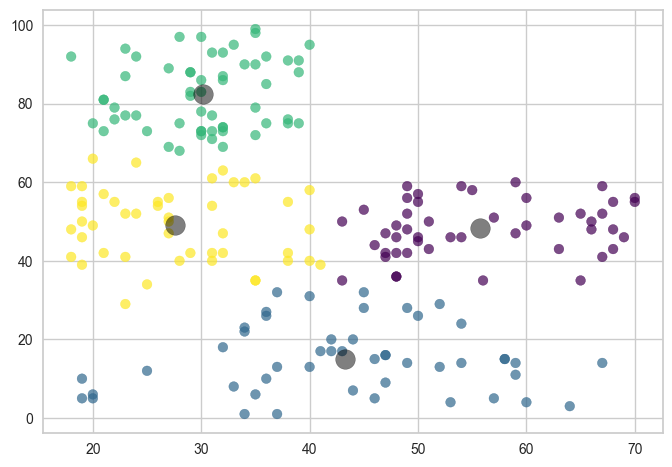

In [24]:
centers = model.cluster_centers_

plt.scatter(X["Age"], X["Spending_Score"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)  # X.predicted_clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

<AxesSubplot:xlabel='predicted_clusters', ylabel='Spending_Score'>

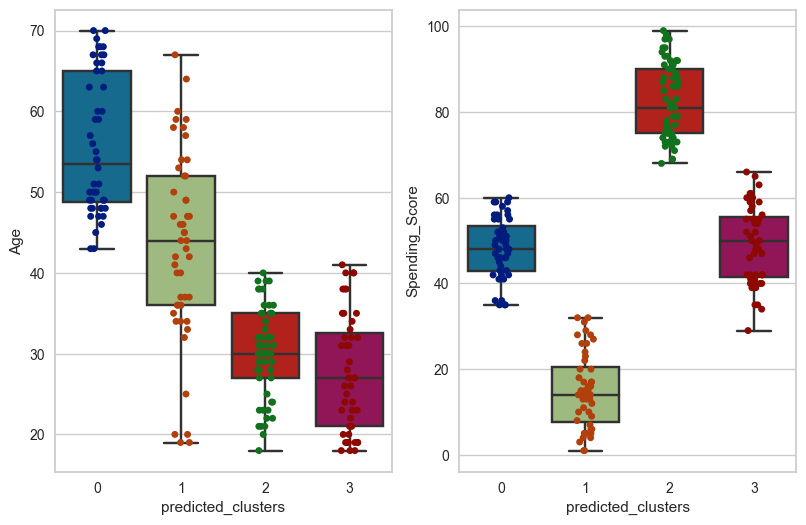

In [25]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Age", x = "predicted_clusters", data = X)
sns.stripplot(y = "Age", x = "predicted_clusters", data = X, palette="dark")

plt.subplot(142)
sns.boxplot(y = "Spending_Score", x = "predicted_clusters", data = X)
sns.stripplot(y = "Spending_Score", x = "predicted_clusters", data = X, palette="dark")

In [26]:
X["predicted_clusters"]

0      3
1      2
2      1
3      2
4      3
      ..
195    2
196    1
197    2
198    1
199    2
Name: predicted_clusters, Length: 200, dtype: int32

In [27]:
X["predicted_labels"] = X.predicted_clusters.map({0:"Old regular", 1:"Low spender", 2:"Mid_age spender", 3:"Mid_age regular"})

In [28]:
X

,Age,Spending_Score,predicted_clusters,predicted_labels
0,19,39,3,Mid_age regular
1,21,81,2,Mid_age spender
2,20,6,1,Low spender
3,23,77,2,Mid_age spender
4,31,40,3,Mid_age regular
...,...,...,...,...
195,35,79,2,Mid_age spender
196,45,28,1,Low spender
197,32,74,2,Mid_age spender
198,32,18,1,Low spender


### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [29]:
X_2 = df.iloc[:, [3, 4]]
X_2

,Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### *ii. Determine optimal number of clusters*

In [30]:
hopkins(X_2, X_2.shape[0])

0.29898402172445054

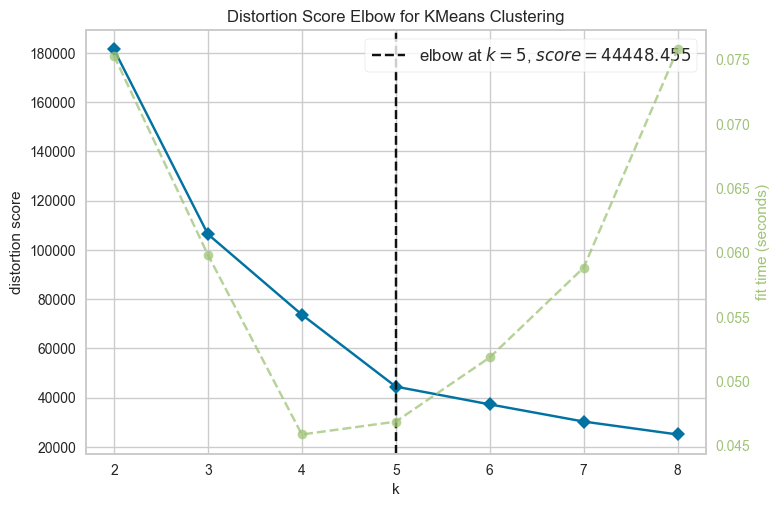

In [31]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_2)        # Fit the data to the visualizer
visualizer.show();

In [32]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


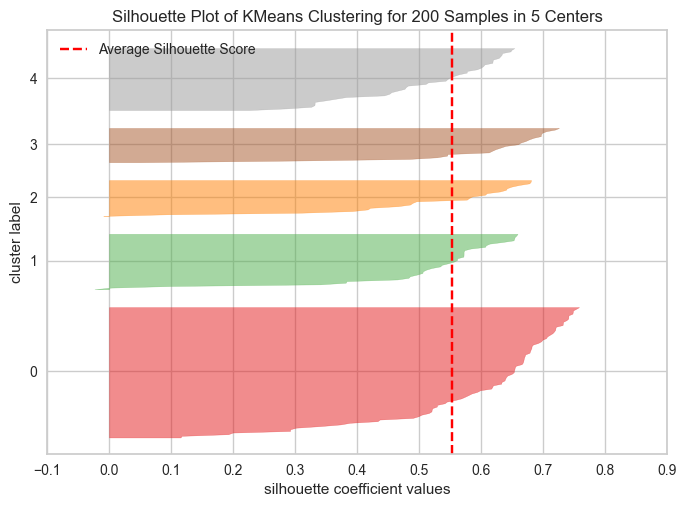

In [33]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model5 = KMeans(n_clusters=5, random_state=42)          # Check n_cluster=3
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X_2)    # Fit the data to the visualizer
visualizer.poof();

In [34]:
for i in range(5):
    label = (model5.labels_== i)
    print(f"mean silhouette score for label {i:<5} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0     : 0.5966512190217801
mean silhouette score for label 1     : 0.5039873487056818
mean silhouette score for label 2     : 0.5122676140736505
mean silhouette score for label 3     : 0.5990128687006722
mean silhouette score for label 4     : 0.5091706489322517
mean silhouette score for all labels : 0.553931997444648


#### *iii. Apply K Means*

In [35]:
model_2 = KMeans(n_clusters = 5, random_state=42)
model_2.fit_predict(X_2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [36]:
clusters_2 = model_2.labels_

X_2["predicted_clusters"] = clusters_2

In [37]:
X_2

,Income,Spending_Score,predicted_clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

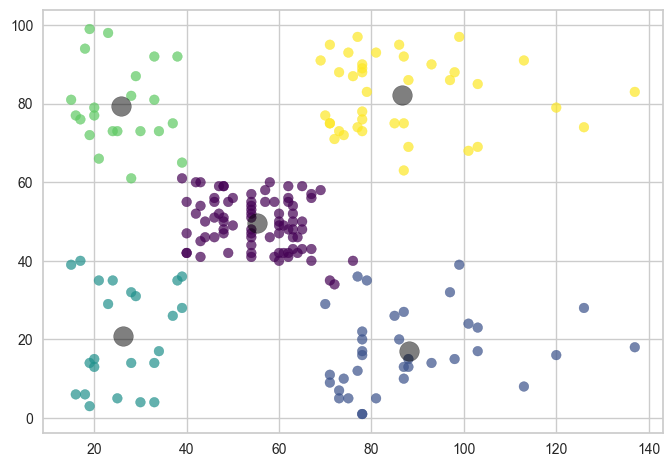

In [38]:
centers_2 = model_2.cluster_centers_

plt.scatter(X_2["Income"], X_2["Spending_Score"], c = X_2.predicted_clusters, cmap = "viridis", alpha=0.7)  # X.predicted_clusters
plt.scatter(centers_2[:, 0], centers_2[:, 1], c='black', s=200, alpha=0.5)

<AxesSubplot:xlabel='predicted_clusters', ylabel='Spending_Score'>

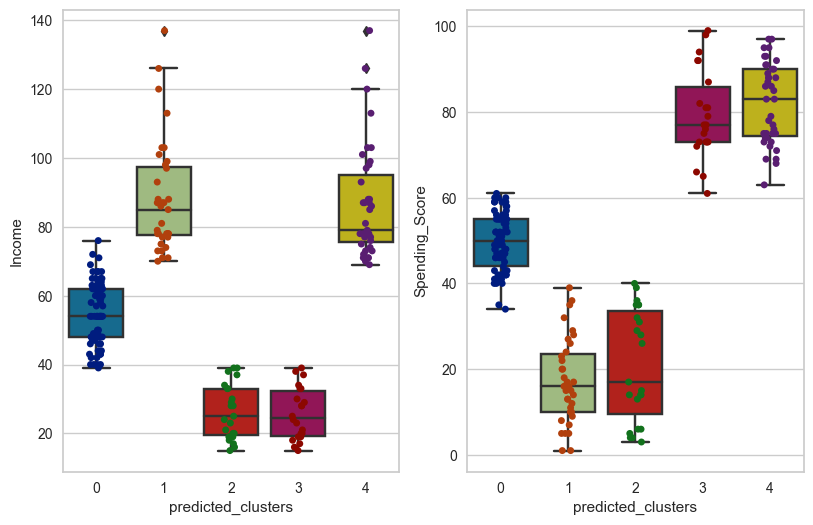

In [39]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Income", x = "predicted_clusters", data = X_2)
sns.stripplot(y = "Income", x = "predicted_clusters", data = X_2, palette="dark")

plt.subplot(142)
sns.boxplot(y = "Spending_Score", x = "predicted_clusters", data = X_2)
sns.stripplot(y = "Spending_Score", x = "predicted_clusters", data = X_2, palette="dark")

In [40]:
X_2["predicted_labels"] = X_2.predicted_clusters.map({0:"Medium_income, medium_spender", 1:"High_income, low_spender", 2:"Low_income, low_spender", 3:"Low_income, high_spender", 4:"High_income, high_spender"})

In [41]:
X_2

,Income,Spending_Score,predicted_clusters,predicted_labels
0,15,39,2,"Low_income, low_spender"
1,15,81,3,"Low_income, high_spender"
2,16,6,2,"Low_income, low_spender"
3,16,77,3,"Low_income, high_spender"
4,17,40,2,"Low_income, low_spender"
...,...,...,...,...
195,120,79,4,"High_income, high_spender"
196,126,28,1,"High_income, low_spender"
197,126,74,4,"High_income, high_spender"
198,137,18,1,"High_income, low_spender"


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [42]:
X_3 = df.iloc[:, [2, 4]]
X_3

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

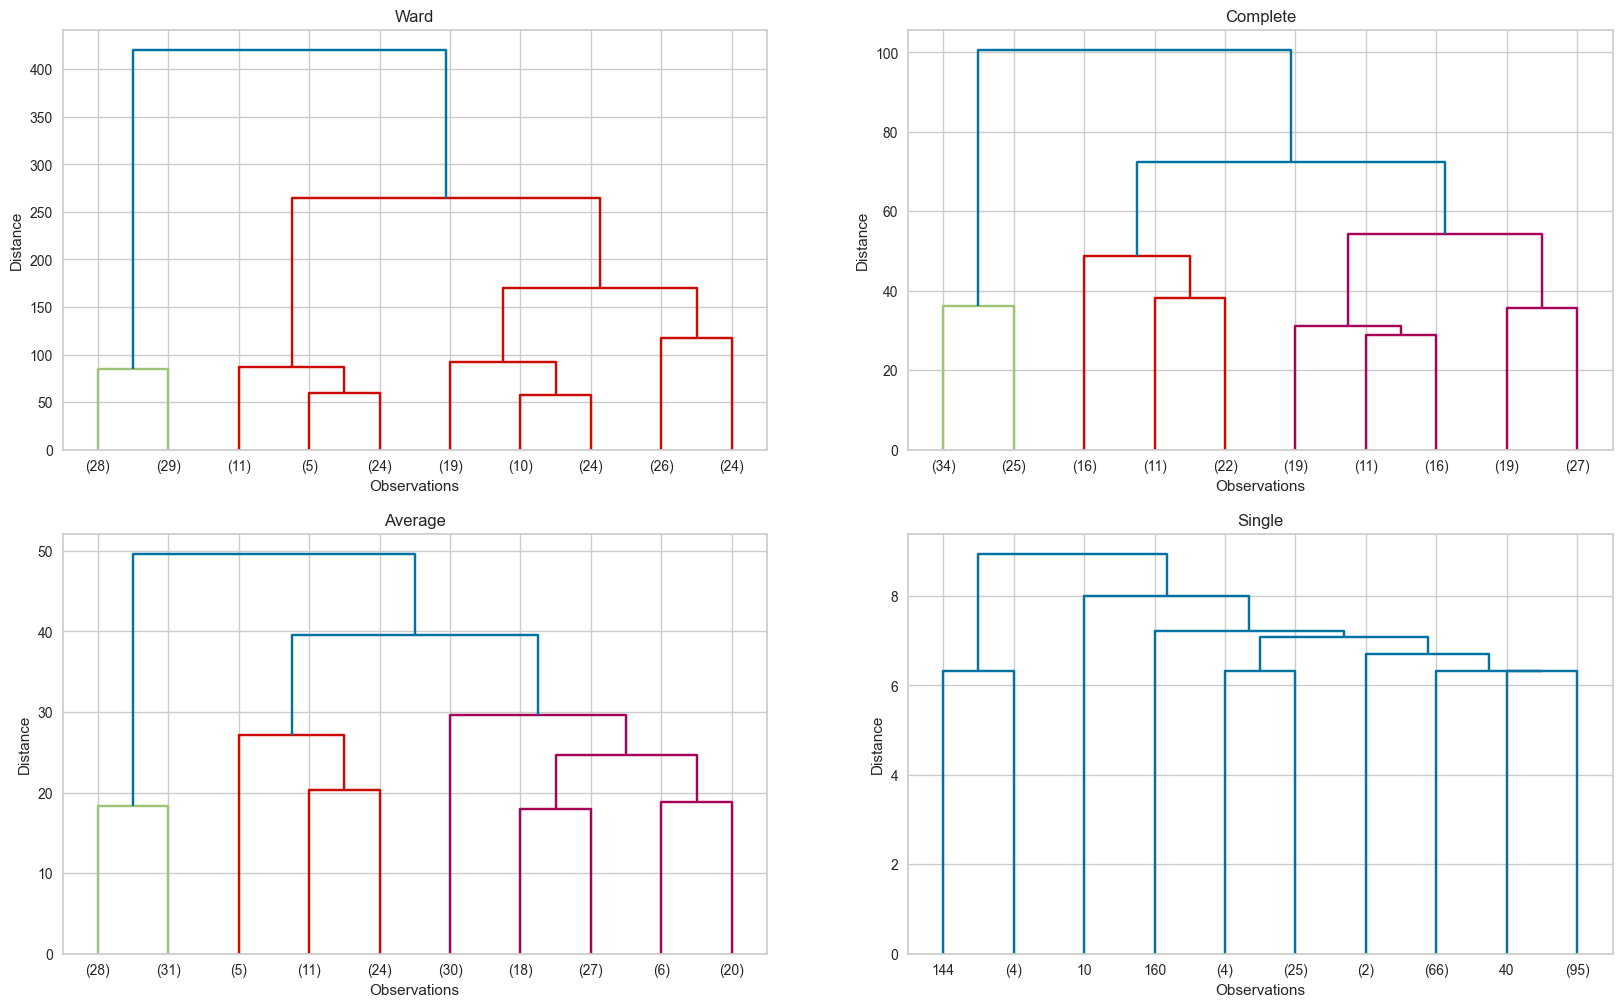

In [44]:
hc_ward = linkage(y=X_3, method = "ward")
hc_complete = linkage(X_3, "complete")
hc_average = linkage(X_3, "average")
hc_single = linkage(X_3, "single")

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X_3)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_3, model.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


### ii. *Apply Agglomerative Clustering*

In [47]:
model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X_3)

In [48]:
X_3["predicted_clusters"] = clusters
X_3.head()

,Age,Spending_Score,predicted_clusters
0,19,39,0
1,21,81,3
2,20,6,2
3,23,77,3
4,31,40,0


### iii. *Visualizing and Labeling All the Clusters* 

<Figure size 2000x1000 with 0 Axes>

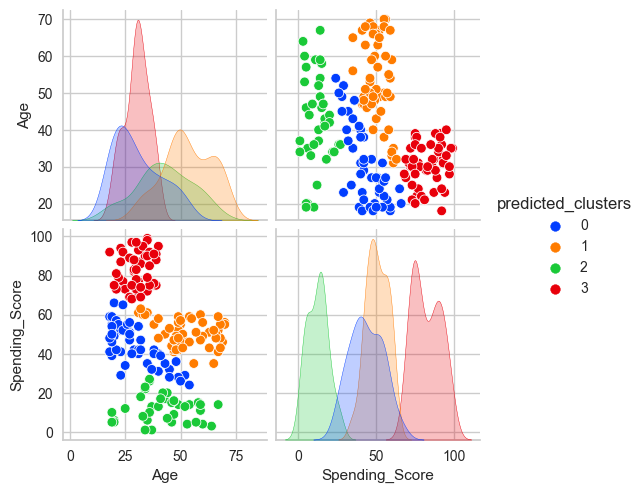

In [49]:
plt.figure(figsize = (20,10))
sns.pairplot(X_3, hue= "predicted_clusters", palette="bright");

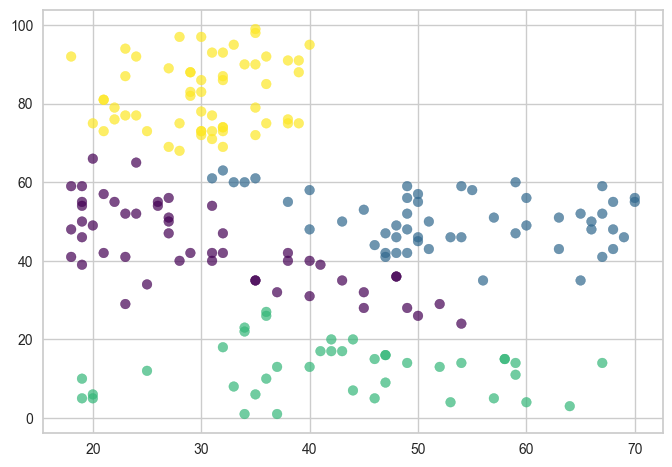

In [62]:
plt.scatter(X_3["Age"], X_3["Spending_Score"], c = X_3.predicted_clusters, cmap = "viridis", alpha=0.7)  # X.predicted_clusters

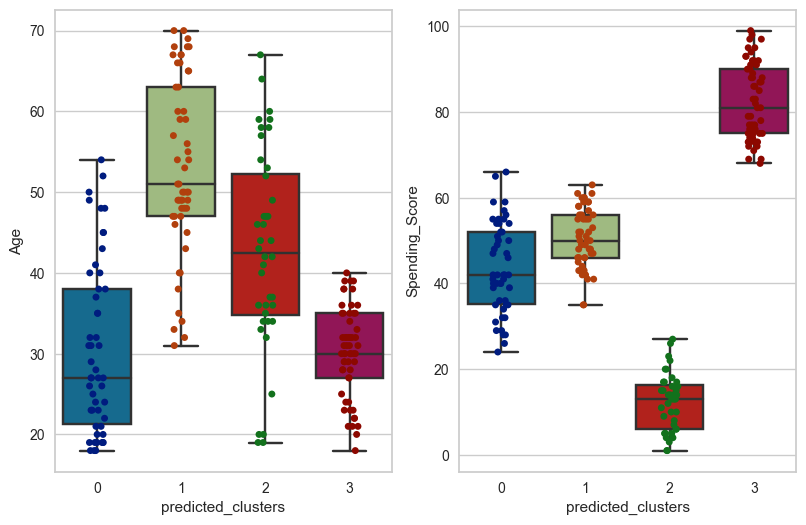

In [61]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Age", x = "predicted_clusters", data = X_3)
sns.stripplot(y = "Age", x = "predicted_clusters", data = X_3, palette="dark")

plt.subplot(142)
sns.boxplot(y = "Spending_Score", x = "predicted_clusters", data = X_3)
sns.stripplot(y = "Spending_Score", x = "predicted_clusters", data = X_3, palette="dark");

In [50]:
X_3["predicted_labels"] = X_3.predicted_clusters.map({0:"medium_spender", 1:"Old, medium_spender", 2:"low_spender", 3:"Young, high_spender"})

In [51]:
X_3

,Age,Spending_Score,predicted_clusters,predicted_labels
0,19,39,0,medium_spender
1,21,81,3,"Young, high_spender"
2,20,6,2,low_spender
3,23,77,3,"Young, high_spender"
4,31,40,0,medium_spender
...,...,...,...,...
195,35,79,3,"Young, high_spender"
196,45,28,0,medium_spender
197,32,74,3,"Young, high_spender"
198,32,18,2,low_spender


## Clustering based on Annual Income and Spending Score- x2

In [52]:
X_4 = df.iloc[:, [3, 4]]
X_4

,Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


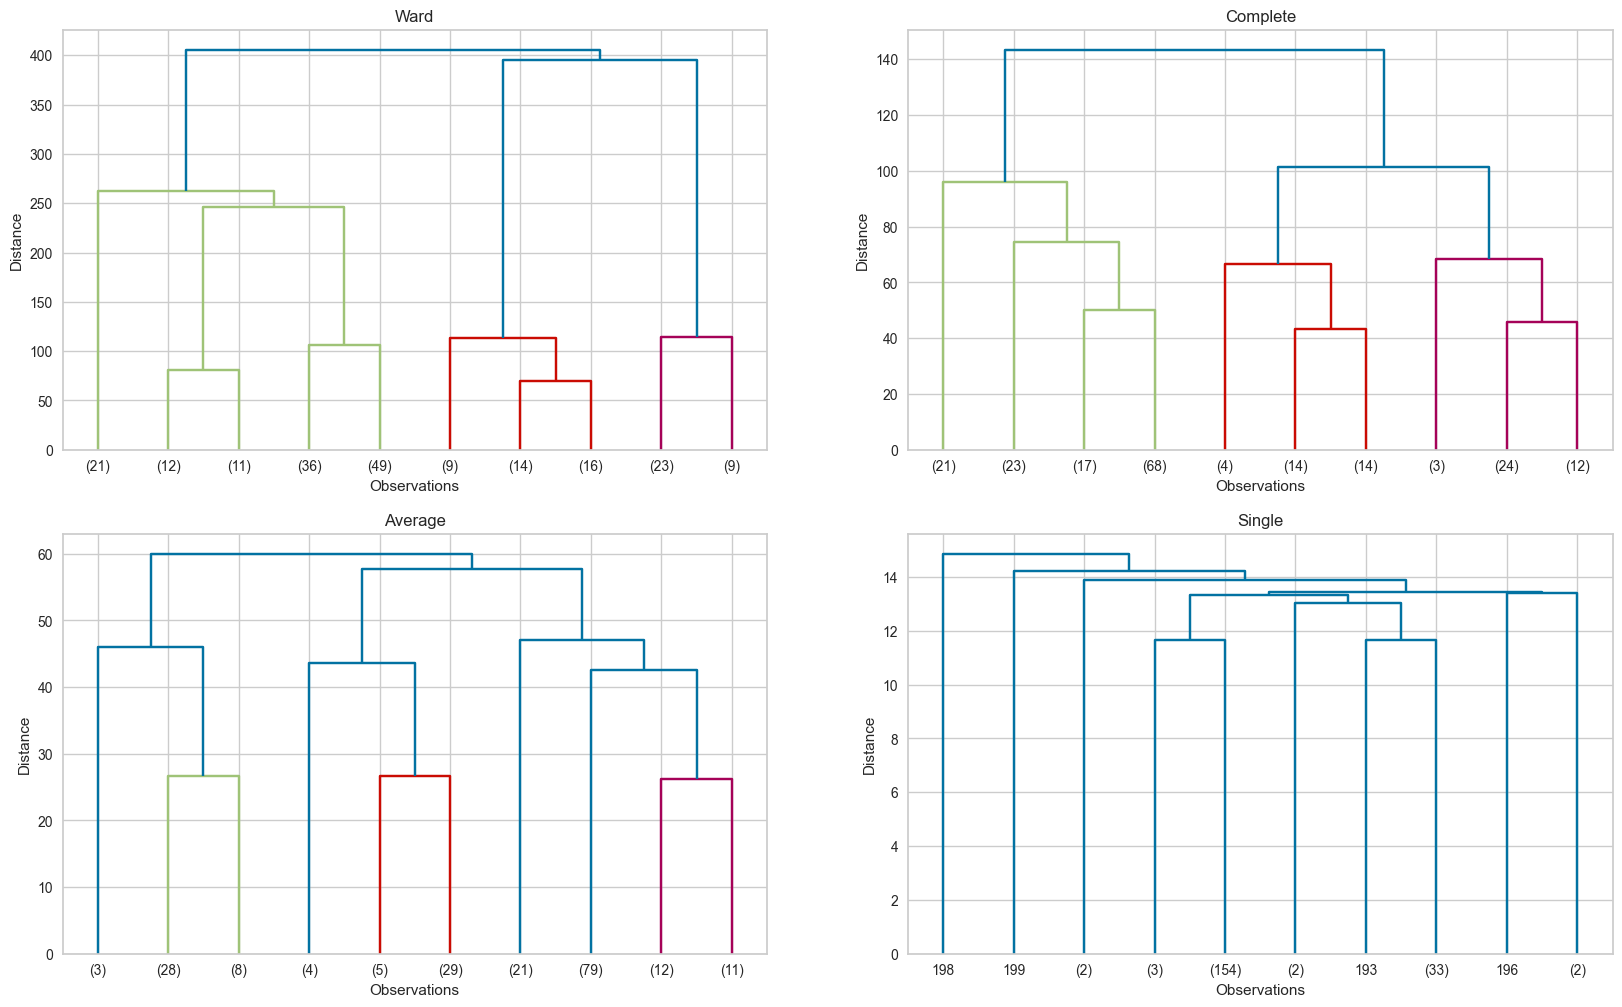

In [53]:
hc_ward = linkage(y=X_4, method = "ward")
hc_complete = linkage(X_4, "complete")
hc_average = linkage(X_4, "average")
hc_single = linkage(X_4, "single")

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

In [54]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X_4)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_4, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


### ii. *Apply Agglomerative Clustering*

In [55]:
model_4 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
clusters = model_4.fit_predict(X_4)

In [56]:
X_4["predicted_clusters"] = clusters
X_4.head()

,Income,Spending_Score,predicted_clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


### iii. *Visualizing and Labeling All the Clusters* 

<Figure size 2000x1000 with 0 Axes>

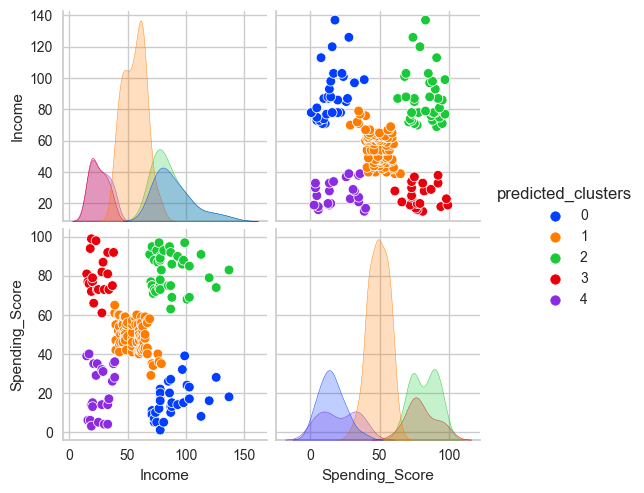

In [57]:
plt.figure(figsize = (20,10))
sns.pairplot(X_4, hue= "predicted_clusters", palette="bright");

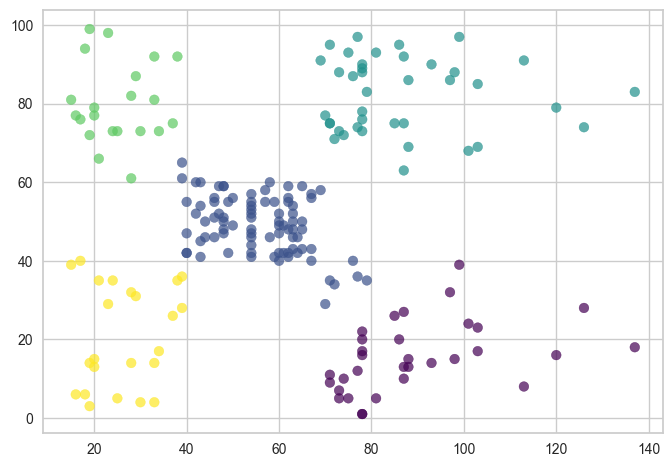

In [64]:
plt.scatter(X_4["Income"], X_4["Spending_Score"], c = X_4.predicted_clusters, cmap = "viridis", alpha=0.7);  # X.predicted_clusters

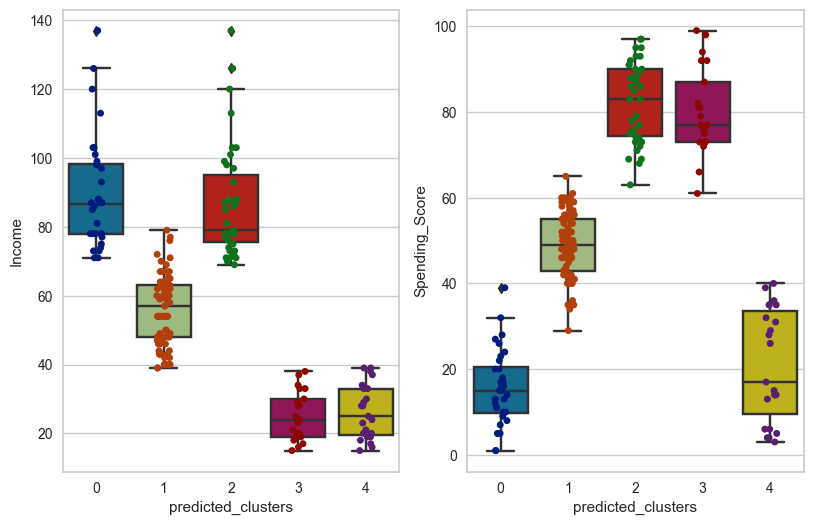

In [66]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Income", x = "predicted_clusters", data = X_4)
sns.stripplot(y = "Income", x = "predicted_clusters", data = X_4, palette="dark")

plt.subplot(142)
sns.boxplot(y = "Spending_Score", x = "predicted_clusters", data = X_4)
sns.stripplot(y = "Spending_Score", x = "predicted_clusters", data = X_4, palette="dark");

In [67]:
X_4["predicted_labels"] = X_4.predicted_clusters.map({0:"High_income, low_spender", 1:"Medium_income, medium_spender", 2:"High_income, high_spender", 3:"Low_income, high_spender", 4:"Low_income, low_spender",})

In [68]:
X_4

,Income,Spending_Score,predicted_clusters,predicted_labels
0,15,39,4,"Low_income, low_spender"
1,15,81,3,"Low_income, high_spender"
2,16,6,4,"Low_income, low_spender"
3,16,77,3,"Low_income, high_spender"
4,17,40,4,"Low_income, low_spender"
...,...,...,...,...
195,120,79,2,"High_income, high_spender"
196,126,28,0,"High_income, low_spender"
197,126,74,2,"High_income, high_spender"
198,137,18,0,"High_income, low_spender"


### Model Comparison

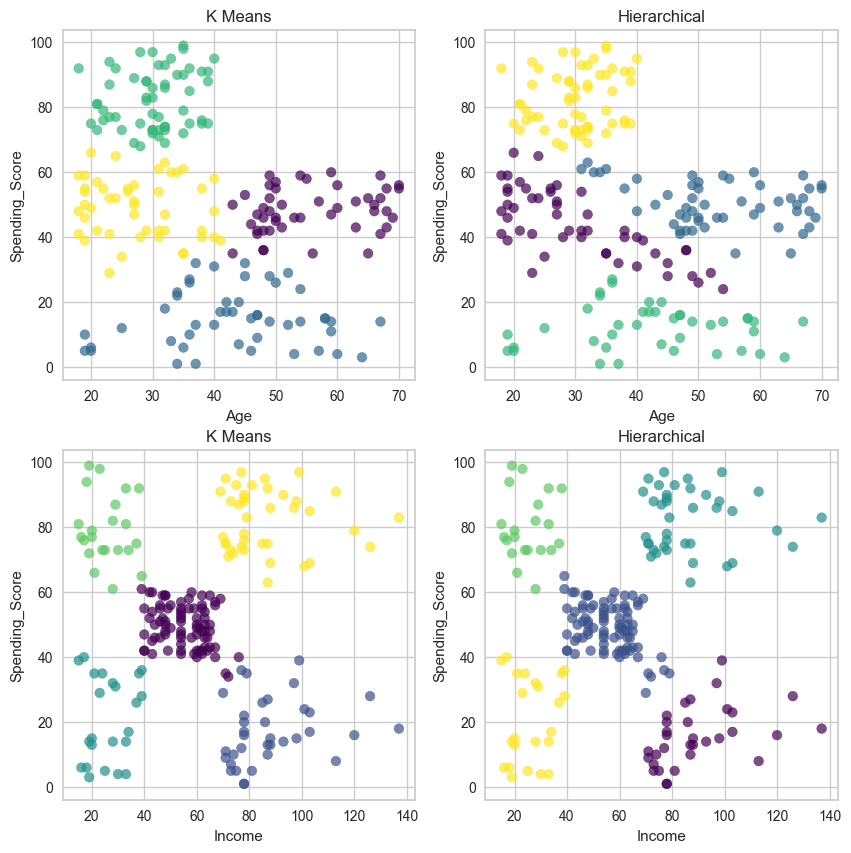

In [100]:
plt.figure(figsize = (10,10))

plt.subplot(221)
plt.scatter(X["Age"], X["Spending_Score"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7, label='Inline label')
plt.title("K Means")
plt.xlabel("Age")
plt.ylabel("Spending_Score")

plt.subplot(222)
plt.scatter(X_3["Age"], X_3["Spending_Score"], c = X_3.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("Hierarchical")
plt.xlabel("Age")
plt.ylabel("Spending_Score")

plt.subplot(223)
plt.scatter(X_2["Income"], X_2["Spending_Score"], c = X_2.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("K Means")
plt.xlabel("Income")
plt.ylabel("Spending_Score")

plt.subplot(224)
plt.scatter(X_4["Income"], X_4["Spending_Score"], c = X_4.predicted_clusters, cmap = "viridis", alpha=0.7) 
plt.title("Hierarchical")
plt.xlabel("Income")
plt.ylabel("Spending_Score");

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**Old regular** : Average age is around 50 and average spending score is around 50. We can provide promotions with their interests to increase the average spending score. 

**Low spender**: This group has a very low spending score and includes people from all ages. We should have a better understanding for this group with considering their income and gender as well. 

**Mid_age spender** : Average age is around 30, average spending score is around 85. We should protect these customers with providing gift cards and etc.      
    
**Mid_age regular**: Average age is around 30, average spending score is around 50. We should provide special deals and sales to them for reaching these customers. 

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

**High_income, low_spender** : Average income is around 90 and average spending score is around 20. We should try to understand why their spending is low even with their high income with considering their age and gender. 

**Medium_income, medium_spender**: Both Average income and average spending score is around 50. We can try to improve spending score with promotions and sales. 

**High_income, high_spender** : Average income is around 90 and average spending score is around 80. We should keep protect this loyal customers. Or try to improve if possible. We should target these customers. 

**Low_income, high_spender**: Average income is around 30 and average spending score is around 80. We should target these customers. 

**Low_income, low_spender**: Average income is around 20 and average spending score is around 20. We should provide special deals and sales to them for reaching these customers. 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___